# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Findings
1. YouTube (Google) seems to adhere to at least Art. 6 (1), Art. 7 (3) and Art. 7 (4), i.e. a consent of personal data processing must be asked, consent should be withdrawable at any given time and consenting all personal data collection shouldnt be a necessity (if actually a necessity) to access a service.

2. The word "data subject" struck 400 matches in a 88 page document. GPT-5 helped me and it seems Art 15 (Right of access by the data subject) is the correct place to find these rights. Some include

(a) the purposes of the processing,
(b) the categories of personal data concerned,
(c) the recipients or categories of recipients (including in third countries or international organizations),
(d) the envisaged period for which the personal data will be stored, or if not possible, the criteria used to determine that period,
(e) the existence of your rights (rectification, erasure, restriction, objection, complaint),
(f) where the data is not collected from you, any available information as to its source,
(g) the existence of automated decision-making, including profiling, and meaningful information about the logic involved and the consequences for you.
Additionally, Art. 15(3) gives you the right to a copy of the personal data being processed. For any further copies, controllers may charge a reasonable fee.

I filed an access request to Google about my personal information. It seems around 40GB in .tgz (since apparently thats more efficient than .zip but works mainly on GNU).  I don't think my rights as data subject are respected in practice. Google uses my information within the massive system it controls so tehcnically it's not "selling" data to others. In spirit I think Google violates many of the articles and sub-articles of the GDPR and gets away with it. I think the GDPR is a start and is already in a relatively good place now but much work is still to be done.

Anonymization is when data is anonymized beyond recovery to identifiable personal info. Pseudonymized data can be restored back to a form where a person can be identified from it but probably involves cryptography so that only the selected few can decrypt it. The question whether or not pseudonymization is an ok thing to do in todays world is a good one since its not so simple. Ideally however it should not exist.

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

In [ ]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [ ]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

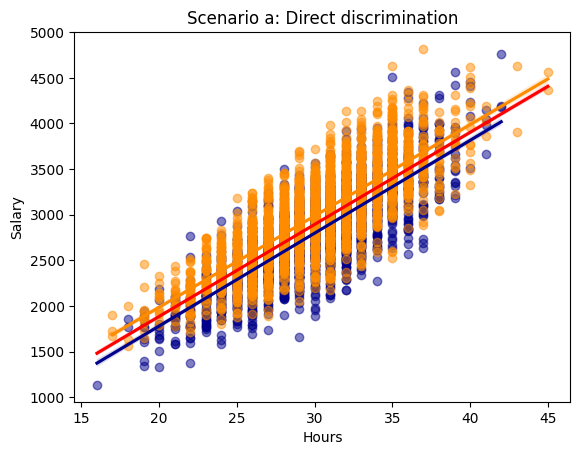

Scenario a slope: 100.87


In [6]:
# --- Scenario a: Direct discrimination ---
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Sample size
n = 5000
np.random.seed(0)

# Gender
gen = np.random.binomial(1, 0.5, size=n)

# Work hours
hrs = np.random.binomial(60, 0.5, size=n)

# Salary = hours * (100 + noise), with penalty for women
sal = hrs * np.random.normal(100, 10, size=n)
sal[gen == 1] -= 200  # women get -200 euros

# DataFrame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

# Plot
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1],
            color="darkblue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0],
            color="darkorange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
plt.title("Scenario a: Direct discrimination")
plt.show()

# Regression slope (no gender in model)
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))
print("Scenario a slope: %.2f" % reg.coef_[0][0])


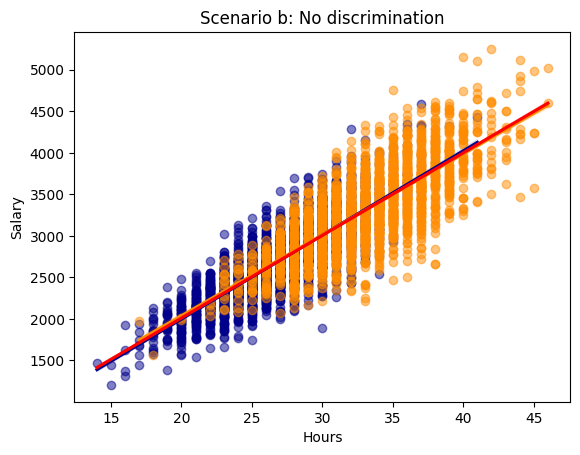

Scenario b slope: 99.46


In [7]:
# --- Scenario b: No discrimination (different hours distributions) ---
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Sample size
n = 5000
np.random.seed(0)

# Gender
gen = np.random.binomial(1, 0.5, size=n)

# Hours differ by gender
hrs = np.where(gen == 0,
               np.random.binomial(60, 0.55, size=n),  # men
               np.random.binomial(60, 0.45, size=n))  # women

# Salary
sal = hrs * np.random.normal(100, 10, size=n)

# DataFrame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

# Plot
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1],
            color="darkblue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0],
            color="darkorange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
plt.title("Scenario b: No discrimination")
plt.show()

# Regression slope
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))
print("Scenario b slope: %.2f" % reg.coef_[0][0])


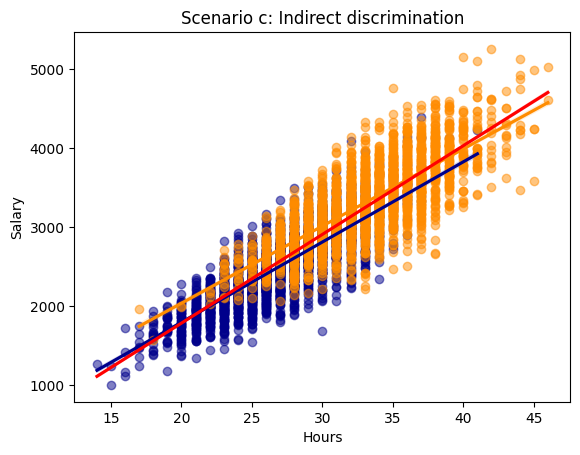

Scenario c slope: 112.08


In [8]:
# --- Scenario c: Indirect discrimination (a + b) ---
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Sample size
n = 5000
np.random.seed(0)

# Gender
gen = np.random.binomial(1, 0.5, size=n)

# Hours differ by gender
hrs = np.where(gen == 0,
               np.random.binomial(60, 0.55, size=n),  # men
               np.random.binomial(60, 0.45, size=n))  # women

# Salary with penalty for women
sal = hrs * np.random.normal(100, 10, size=n)
sal[gen == 1] -= 200

# DataFrame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

# Plot
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1],
            color="darkblue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0],
            color="darkorange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
plt.title("Scenario c: Indirect discrimination")
plt.show()

# Regression slope
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))
print("Scenario c slope: %.2f" % reg.coef_[0][0])


1.  C seems to be the only scenario where the slope (coefficient) of the regression model changes drastically (112.08)
2.  I think in this scenario it would fix the problem by include the protected characteristic but this wouldnt fix the problem in other datasets